# Pollution

## Data import

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('model_pollution.csv')


In [2]:
df.head(3)

,hour,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,wind,wind_sp,date,carb_monox
0,23,13.0,43.0,1.0,19.0,29.0,7.6,1021.3,0.0,NNW,2.5,23-Oct-2014,200.0
1,21,77.0,115.0,31.0,74.0,10.0,0.0,1015.0,0.0,W,0.7,9-Jan-2016,2100.0
2,21,86.0,141.0,9.0,43.0,198.0,29.3,1000.9,0.0,SSE,0.4,11-Jul-2016,700.0


In [3]:
df.isnull().sum()

hour            0
small_part    332
med_part      251
sulf_diox     309
nitr_diox     338
trioxygen     437
temp           15
pres           14
rain           15
wind           45
wind_sp        11
date            0
carb_monox      0
dtype: int64

## Split categorical/continuos variables

In [4]:
df.columns

Index(['hour', 'small_part', 'med_part', 'sulf_diox', 'nitr_diox', 'trioxygen',
       'temp', 'pres', 'rain', 'wind', 'wind_sp', 'date', 'carb_monox'],
      dtype='object')

In [5]:
df.dtypes

hour            int64
small_part    float64
med_part      float64
sulf_diox     float64
nitr_diox     float64
trioxygen     float64
temp          float64
pres          float64
rain          float64
wind           object
wind_sp       float64
date           object
carb_monox    float64
dtype: object

In [6]:
df.isna().any()

hour          False
small_part     True
med_part       True
sulf_diox      True
nitr_diox      True
trioxygen      True
temp           True
pres           True
rain           True
wind           True
wind_sp        True
date          False
carb_monox    False
dtype: bool

In [7]:
df.fillna(df.mean(),inplace=True)

In [8]:
df[['day','month','year']]=df['date'].str.split('-', expand=True)

In [9]:
df.head()

,hour,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,wind,wind_sp,date,carb_monox,day,month,year
0,23,13.000000,43.000000,1.000000,19.000000,29.0,7.6,1021.3,0.0,NNW,2.5,23-Oct-2014,200.000,23,Oct,2014
1,21,77.000000,115.000000,31.000000,74.000000,10.0,0.0,1015.0,0.0,W,0.7,9-Jan-2016,2100.000,9,Jan,2016
2,21,86.000000,141.000000,9.000000,43.000000,198.0,29.3,1000.9,0.0,SSE,0.4,11-Jul-2016,700.000,11,Jul,2016
3,11,78.745237,103.551407,16.060271,52.454812,20.0,14.2,1015.2,0.0,ESE,1.9,29-Oct-2015,1222.923,29,Oct,2015
4,0,77.000000,57.000000,41.000000,48.000000,16.0,-1.0,1024.2,0.0,SSW,1.3,7-Feb-2015,1300.000,7,Feb,2015


In [10]:
df.dtypes

hour            int64
small_part    float64
med_part      float64
sulf_diox     float64
nitr_diox     float64
trioxygen     float64
temp          float64
pres          float64
rain          float64
wind           object
wind_sp       float64
date           object
carb_monox    float64
day            object
month          object
year           object
dtype: object

In [11]:
df.drop(['date'],axis=1,inplace=True)

In [12]:
df['day']=pd.to_numeric(df['day'])

In [13]:
df['year']=pd.to_numeric(df['year'])

In [14]:
df_categorical=df.select_dtypes(include=['object'])
#df_categorical=df[[]]
df_categorical.head()

,wind,month
0,NNW,Oct
1,W,Jan
2,SSE,Jul
3,ESE,Oct
4,SSW,Feb


In [15]:
df_numerical=df.select_dtypes(include=['int64','float64'])
#df_numerical=df[[ ]]
df_numerical.head()

,hour,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,wind_sp,carb_monox,day,year
0,23,13.000000,43.000000,1.000000,19.000000,29.0,7.6,1021.3,0.0,2.5,200.000,23,2014
1,21,77.000000,115.000000,31.000000,74.000000,10.0,0.0,1015.0,0.0,0.7,2100.000,9,2016
2,21,86.000000,141.000000,9.000000,43.000000,198.0,29.3,1000.9,0.0,0.4,700.000,11,2016
3,11,78.745237,103.551407,16.060271,52.454812,20.0,14.2,1015.2,0.0,1.9,1222.923,29,2015
4,0,77.000000,57.000000,41.000000,48.000000,16.0,-1.0,1024.2,0.0,1.3,1300.000,7,2015


## Categorical data

In [16]:
dummies = pd.get_dummies(df_categorical.astype(str),drop_first=True) 

dummies.tail()

,wind_ENE,wind_ESE,wind_N,wind_NE,wind_NNE,wind_NNW,wind_NW,wind_S,wind_SE,wind_SSE,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
13995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13996,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13999,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Numerical data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f088515a350>,
      dtype=object)

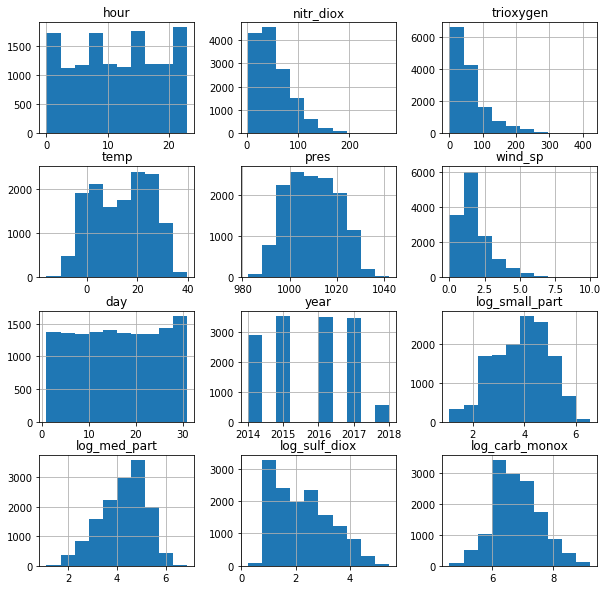

In [21]:
df_numerical.hist(figsize=(10,10))

In [22]:
df.columns

Index(['hour', 'small_part', 'med_part', 'sulf_diox', 'nitr_diox', 'trioxygen',
       'temp', 'pres', 'rain', 'wind', 'wind_sp', 'carb_monox', 'day', 'month',
       'year'],
      dtype='object')

In [19]:
df_numerical['log_rain']=np.log(df_numerical['rain']+1)
df_numerical['log_small_part']=np.log(df_numerical['small_part']+1)
df_numerical['log_med_part']=np.log(df_numerical['med_part']+1)
df_numerical['log_sulf_diox']=np.log(df_numerical['sulf_diox']+1)
df_numerical['log_carb_monox']=np.log(df_numerical['carb_monox']+1)



/home/mausoto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_numerical.drop(['small_part', 'med_part', 'sulf_diox', 'rain', 'log_rain', 'carb_monox'],axis=1, inplace=True)

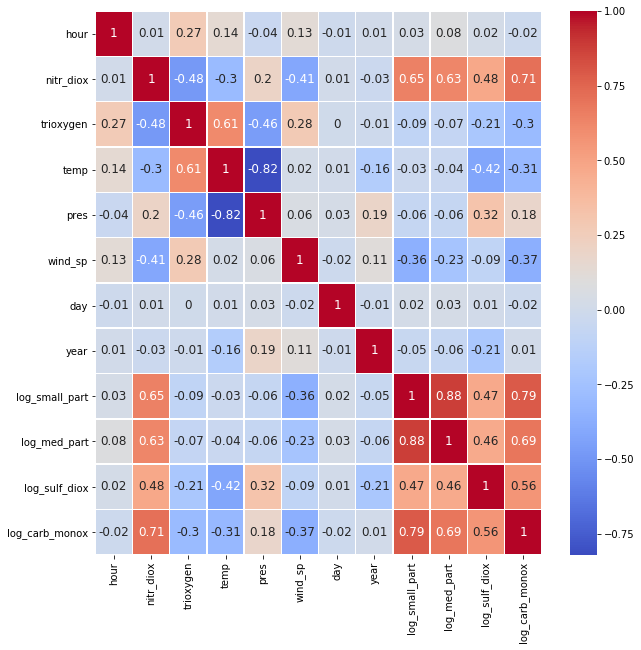

In [23]:
#We can visualise the correlation using a heatmap in Seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,10))
sns.heatmap(data=df_numerical.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

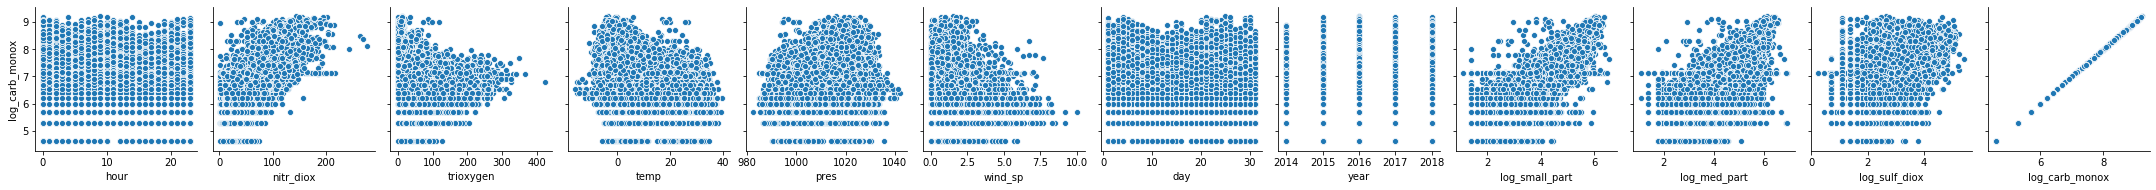

In [24]:
# visualize the relationship between the features and the response using scatterplots
%matplotlib inline
import seaborn as sns
sns.pairplot(df_numerical, x_vars=df_numerical.columns, y_vars='log_carb_monox')

## Standarize

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_numerical)
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df.columns = df_numerical.columns

scaled_df.head()

,hour,nitr_diox,trioxygen,temp,pres,wind_sp,day,year,log_small_part,log_med_part,log_sulf_diox,log_carb_monox
0,1.640549,-9.650294e-01,-0.508910,-0.539238,1.098403,0.600621,0.812969,-1.416317,-1.173090,-0.509620,-1.561441,-1.865579
1,1.352166,6.214873e-01,-0.850160,-1.204674,0.499790,-0.853181,-0.771672,0.288988,0.441622,0.515522,1.165008,1.077697
2,1.352166,-2.727312e-01,2.526422,1.360756,-0.839961,-1.095481,-0.545294,0.288988,0.544277,0.729388,0.021214,-0.298914
3,-0.089749,-8.198457e-16,-0.670554,0.038640,0.518794,0.116020,1.492101,-0.563664,0.462424,0.405636,0.546492,0.400024
4,-1.675855,-1.285024e-01,-0.742397,-1.292231,1.373955,-0.368580,-0.998049,-0.563664,0.441622,-0.217482,1.432416,0.476616


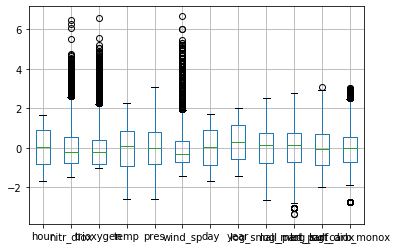

In [26]:
scaled_df.boxplot()

In [27]:
scaled_df

,hour,nitr_diox,trioxygen,temp,pres,wind_sp,day,year,log_small_part,log_med_part,log_sulf_diox,log_carb_monox
0,1.640549,-9.650294e-01,-0.508910,-0.539238,1.098403,0.600621,0.812969,-1.416317,-1.173090,-0.509620,-1.561441,-1.865579
1,1.352166,6.214873e-01,-0.850160,-1.204674,0.499790,-0.853181,-0.771672,0.288988,0.441622,0.515522,1.165008,1.077697
2,1.352166,-2.727312e-01,2.526422,1.360756,-0.839961,-1.095481,-0.545294,0.288988,0.544277,0.729388,0.021214,-0.298914
3,-0.089749,-8.198457e-16,-0.670554,0.038640,0.518794,0.116020,1.492101,-0.563664,0.462424,0.405636,0.546492,0.400024
4,-1.675855,-1.285024e-01,-0.742397,-1.292231,1.373955,-0.368580,-0.998049,-0.563664,0.441622,-0.217482,1.432416,0.476616
...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0.919592,-7.342633e-01,1.736158,1.562138,-1.695122,-0.045513,-0.658483,-0.563664,-0.936837,-1.454834,-0.879829,-0.999405
13996,0.198634,-3.881143e-01,-0.688515,-1.117117,0.214737,0.842921,0.473403,0.288988,0.806578,0.506366,-0.481111,0.736842
13997,-0.378132,7.657161e-01,-0.993844,-1.318498,1.706517,-0.449347,0.926158,1.141641,-0.367027,-0.049271,-0.198217,0.812828
13998,-1.099089,-7.081092e-02,-0.670554,0.660297,-0.193840,-1.418548,-1.677181,-0.563664,0.441622,0.095819,-1.162723,0.147866


In [28]:
X_numerical=scaled_df.drop(['log_carb_monox'],axis=1)

In [29]:
X_numerical.head()

,hour,nitr_diox,trioxygen,temp,pres,wind_sp,day,year,log_small_part,log_med_part,log_sulf_diox
0,1.640549,-9.650294e-01,-0.508910,-0.539238,1.098403,0.600621,0.812969,-1.416317,-1.173090,-0.509620,-1.561441
1,1.352166,6.214873e-01,-0.850160,-1.204674,0.499790,-0.853181,-0.771672,0.288988,0.441622,0.515522,1.165008
2,1.352166,-2.727312e-01,2.526422,1.360756,-0.839961,-1.095481,-0.545294,0.288988,0.544277,0.729388,0.021214
3,-0.089749,-8.198457e-16,-0.670554,0.038640,0.518794,0.116020,1.492101,-0.563664,0.462424,0.405636,0.546492
4,-1.675855,-1.285024e-01,-0.742397,-1.292231,1.373955,-0.368580,-0.998049,-0.563664,0.441622,-0.217482,1.432416


In [30]:
print(dummies.shape)
print(X_numerical.shape)


(14000, 27)
(14000, 11)


In [31]:
X=pd.concat([dummies,X_numerical], axis = 1)
X.tail()

,wind_ENE,wind_ESE,wind_N,wind_NE,wind_NNE,wind_NNW,wind_NW,wind_S,wind_SE,wind_SSE,...,nitr_diox,trioxygen,temp,pres,wind_sp,day,year,log_small_part,log_med_part,log_sulf_diox
13995,0,0,0,0,0,0,0,0,0,0,...,-0.734263,1.736158,1.562138,-1.695122,-0.045513,-0.658483,-0.563664,-0.936837,-1.454834,-0.879829
13996,0,1,0,0,0,0,0,0,0,0,...,-0.388114,-0.688515,-1.117117,0.214737,0.842921,0.473403,0.288988,0.806578,0.506366,-0.481111
13997,1,0,0,0,0,0,0,0,0,0,...,0.765716,-0.993844,-1.318498,1.706517,-0.449347,0.926158,1.141641,-0.367027,-0.049271,-0.198217
13998,0,0,0,0,0,0,0,0,0,0,...,-0.070811,-0.670554,0.660297,-0.193840,-1.418548,-1.677181,-0.563664,0.441622,0.095819,-1.162723
13999,0,0,0,0,1,0,0,0,0,0,...,-0.676572,0.047867,-1.344766,1.307442,-0.045513,-0.884860,1.141641,-1.588443,-1.065964,-0.879829


### Separate Train/Test sets


In [32]:
y=df_numerical['log_carb_monox']

In [33]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(9800, 38) (4200, 38)


## Models

In [44]:
from sklearn.model_selection import GridSearchCV
import numpy as np


def gs_regression(model, par) :
    gs = GridSearchCV(model, par,cv=3,scoring ='neg_mean_absolute_error') 
    gs = gs.fit(X_train,y_train)

    #summarize the results of your GRIDSEARCH
    print('***GRIDSEARCH RESULTS***')
    print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    #for mean, stdev, param in zip(means, stds, params):
    #    print("%f (%f) with: %r" % (mean, stdev, param))
    
    y_pred_train=gs.predict(X_train)
    y_pred_test=gs.predict(X_test) 
        
    from sklearn import metrics
    print("-- LOG --")
    print("MAE  train %.3f    test %.3f" % (metrics.mean_absolute_error(y_train, y_pred_train), metrics.mean_absolute_error(y_test, y_pred_test) ) )
    print("MSE  train %.3f test %.3f" % (metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)) ) 
    print("RMSE train %.3f   test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) ) 
    print("r2   train %.3f     test %.3f" % (metrics.r2_score(y_train, y_pred_train), metrics.r2_score(y_test, y_pred_test)) )
    print("-- ORIGINAL SCALE -- ")
    print("MAE  train %.3f    test %.3f" % (metrics.mean_absolute_error(np.exp(y_train), np.exp(y_pred_train)), metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred_test)) ) )
    print("MSE  train %.3f  test %.3f" % (metrics.mean_squared_error(np.exp(y_train), np.exp(y_pred_train)), metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_test))) ) 
    print("RMSE train %.3f   test %.3f" % (np.sqrt(metrics.mean_squared_error(np.exp(y_train), np.exp(y_pred_train))), np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_test)))) ) 
    print("r2   train %.3f     test %.3f" % (metrics.r2_score(np.exp(y_train), np.exp(y_pred_train)), metrics.r2_score(np.exp(y_test), np.exp(y_pred_test))) )

In [45]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 
parameters = {}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.279323 using {}
-- LOG --
MAE  train 0.278    test 0.283
MSE  train 0.150 test 0.153
RMSE train 0.387   test 0.391
r2   train 0.763     test 0.763
-- ORIGINAL SCALE -- 
MAE  train 326.247    test 330.266
MSE  train 380187.977  test 393848.604
RMSE train 616.594   test 627.574
r2   train 0.721     test 0.722


In [46]:
from sklearn.linear_model import Ridge

regressor = Ridge()
parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.279315 using {'alpha': 1, 'normalize': False}
-- LOG --
MAE  train 0.278    test 0.283
MSE  train 0.150 test 0.153
RMSE train 0.387   test 0.391
r2   train 0.763     test 0.763
-- ORIGINAL SCALE -- 
MAE  train 326.296    test 330.273
MSE  train 380352.516  test 393878.915
RMSE train 616.727   test 627.598
r2   train 0.721     test 0.722


In [47]:
from sklearn.linear_model import Lasso

regressor = Lasso()
parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.280299 using {'alpha': 0.001, 'normalize': False}
-- LOG --
MAE  train 0.280    test 0.283
MSE  train 0.151 test 0.154
RMSE train 0.389   test 0.392
r2   train 0.760     test 0.761
-- ORIGINAL SCALE -- 
MAE  train 328.558    test 331.441
MSE  train 386000.903  test 393988.611
RMSE train 621.290   test 627.685
r2   train 0.717     test 0.722


In [48]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()

parameters = {'n_neighbors': np.arange(20,50,10),
              'p': [1,2]
            }

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.264528 using {'n_neighbors': 20, 'p': 1}
-- LOG --
MAE  train 0.242    test 0.255
MSE  train 0.114 test 0.124
RMSE train 0.337   test 0.353
r2   train 0.820     test 0.807
-- ORIGINAL SCALE -- 
MAE  train 278.277    test 287.540
MSE  train 280957.300  test 284072.196
RMSE train 530.054   test 532.984
r2   train 0.794     test 0.799


In [50]:
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor()
parameters = {"max_depth": np.arange(1,8), 
              "min_samples_leaf": [5]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.297841 using {'max_depth': 7, 'min_samples_leaf': 5}
-- LOG --
MAE  train 0.265    test 0.293
MSE  train 0.134 test 0.163
RMSE train 0.366   test 0.404
r2   train 0.788     test 0.747
-- ORIGINAL SCALE -- 
MAE  train 302.543    test 336.628
MSE  train 310275.692  test 385067.401
RMSE train 557.024   test 620.538
r2   train 0.773     test 0.728


In [51]:
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor()
parameters = {"n_estimators":[5,10,100], "criterion": ['mse'], 
              "min_samples_leaf": [10,30], "random_state" : [42]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.257639 using {'criterion': 'mse', 'min_samples_leaf': 10, 'n_estimators': 100, 'random_state': 42}
-- LOG --
MAE  train 0.197    test 0.254
MSE  train 0.082 test 0.128
RMSE train 0.287   test 0.358
r2   train 0.870     test 0.801
-- ORIGINAL SCALE -- 
MAE  train 226.511    test 287.929
MSE  train 206333.166  test 288582.593
RMSE train 454.239   test 537.199
r2   train 0.849     test 0.796


In [ ]:
from sklearn.svm import SVR

regressor = SVR()
parameters = {'C': [0.1,10,1000],
             'epsilon': [0.01,1],
             'gamma':['auto'],
             'kernel': ['linear','poly'],
             'degree': [2,3]
             }

gs_regression(regressor, parameters)

In [178]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(random_state=0)
parameters = {'hidden_layer_sizes': [(10, 5), (20,10,5)],
              'solver' : ['sgd'],
              'batch_size': [20],
              'learning_rate' : ['constant'],
              'alpha':10.0 ** -np.arange(1, 3),
              'max_iter':[10000]}

gs_regression(regressor, parameters)

/home/mausoto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


***GRIDSEARCH RESULTS***
Best score: -776.427899 using {'alpha': 0.01, 'batch_size': 20, 'hidden_layer_sizes': (10, 5), 'learning_rate': 'constant', 'max_iter': 5000, 'solver': 'sgd'}

MAE  train 782.425    test 794.963
MSE  train 1364124.458 test 1417020.070
RMSE train 1167.957   test 1190.387
r2   train -0.000     test -0.000


/home/mausoto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [52]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[5,10,100,300], "learning_rate":[0.001, 0.1,0.5,1,2], 
              "loss": ['linear', 'square'], "random_state" : [0]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.322987 using {'learning_rate': 0.5, 'loss': 'linear', 'n_estimators': 10, 'random_state': 0}
-- LOG --
MAE  train 0.316    test 0.323
MSE  train 0.177 test 0.184
RMSE train 0.420   test 0.429
r2   train 0.721     test 0.715
-- ORIGINAL SCALE -- 
MAE  train 374.025    test 379.276
MSE  train 484547.676  test 499191.785
RMSE train 696.095   test 706.535
r2   train 0.645     test 0.648


In [53]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[5,150], "learning_rate":[0.1,0.5,1,2], 
              "loss": ['ls', 'lad'], "random_state" : [0] ,
             "max_depth":[1,2]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.261032 using {'learning_rate': 0.5, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 150, 'random_state': 0}
-- LOG --
MAE  train 0.234    test 0.259
MSE  train 0.105 test 0.130
RMSE train 0.325   test 0.360
r2   train 0.833     test 0.799
-- ORIGINAL SCALE -- 
MAE  train 266.881    test 295.315
MSE  train 242490.124  test 298032.495
RMSE train 492.433   test 545.924
r2   train 0.822     test 0.790
